#LAB 1

In [1]:
import pandas as pd

In [2]:
us_df = pd.read_csv('us-covid19.csv')

In [3]:
us_df.head()

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
0,01/23/2020,AK,01/16/2020,01/22/2020,0,0,0,0,0,0
1,01/30/2020,AK,01/23/2020,01/29/2020,0,0,0,0,0,0
2,02/06/2020,AK,01/30/2020,02/05/2020,0,0,0,0,0,0
3,02/13/2020,AK,02/06/2020,02/12/2020,0,0,0,0,0,0
4,02/20/2020,AK,02/13/2020,02/19/2020,0,0,0,0,0,0


In [4]:
from pandas.core.util.numba_ import GLOBAL_USE_NUMBA
state = ['CA', 'IL', 'TX', 'WA', 'VA']

for i in state:
  globals()[f'{i}_total'] = us_df.query(f"state == '{i}'")[['date_updated', 'new_cases']]
  globals()[f'{i}_total']['date1'] = pd.to_datetime(globals()[f'{i}_total'].loc[:, "date_updated"])
  globals()[f'{i}_total'] = globals()[f'{i}_total'][['date1', 'new_cases']].rename(columns={'new_cases': i})

In [5]:
year = 2019
area = "서울"

str = f'나는 {year}년도에 {area}에 살았다'
print(str)

나는 2019년도에 서울에 살았다


In [7]:
list = [10,2,30,40]

for i in list :
  print(f'리스트 값 {i}')

리스트 값 10
리스트 값 2
리스트 값 30
리스트 값 40


In [8]:
list = ['CA', 'TX', 'IL', 'WA', 'VA']

for i in list :
  globals()[f'var_{i}'] = i

print(var_CA, var_TX, var_IL, var_WA, var_VA)

CA TX IL WA VA


In [9]:
CA_total.head()

,date1,CA
865,2020-01-23,0
866,2020-01-30,2
867,2020-02-06,6
868,2020-02-13,8
869,2020-02-20,14


In [10]:
IL_total.head()

,date1,IL
2941,2020-01-23,0
2942,2020-01-30,1
2943,2020-02-06,1
2944,2020-02-13,0
2945,2020-02-20,0


In [12]:
from functools import reduce

final_df = reduce(lambda x,y : pd.merge(x,y, on='date1', how='outer'), [CA_total, IL_total, TX_total, WA_total, VA_total])

In [13]:
final_df

,date1,CA,IL,TX,WA,VA
0,2020-01-23,0,0,0,1,0
1,2020-01-30,2,1,0,0,0
2,2020-02-06,6,1,0,0,0
3,2020-02-13,8,0,0,0,0
4,2020-02-20,14,0,0,0,0
...,...,...,...,...,...,...
168,2023-04-13,11054,5767,8321,2429,2192
169,2023-04-20,12518,5578,10244,2391,1829
170,2023-04-27,12533,4192,8346,2265,1581
171,2023-05-04,12010,3992,6584,1809,1657


In [15]:
final_df = final_df.set_index('date1')
final_df.head()

,CA,IL,TX,WA,VA
date1,,,,,
2020-01-23,0,0,0,1,0
2020-01-30,2,1,0,0,0
2020-02-06,6,1,0,0,0
2020-02-13,8,0,0,0,0
2020-02-20,14,0,0,0,0


<Axes: xlabel='date1'>

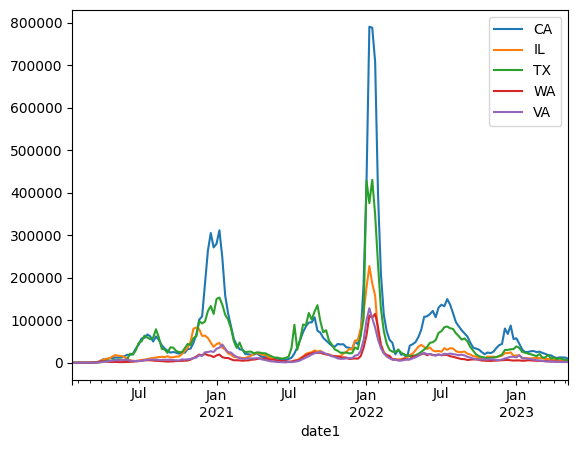

In [16]:
final_df.plot.line()

In [17]:
state = ['CA', 'IL', 'TX', 'WA', 'VA']
rate = [39240000, 12670000, 29530000, 712800, 8642000]
base = rate[state.index('CA')]
print(base)

39240000


In [18]:
for i in enumerate(rate):
  print(i)
  globals()[f'{state[i[0]]}_rate'] = round(base/i[1], 2)

(0, 39240000)
(1, 12670000)
(2, 29530000)
(3, 712800)
(4, 8642000)


In [19]:
for i in state:
  print(globals()[f'{i}_rate'])

1.0
3.1
1.33
55.05
4.54


In [21]:
for i in state:
  final_df[i] = final_df[i] * globals()[f'{i}_rate']
final_df

,CA,IL,TX,WA,VA
date1,,,,,
2020-01-23,0.0,0.0,0.00,55.05,0.00
2020-01-30,2.0,3.1,0.00,0.00,0.00
2020-02-06,6.0,3.1,0.00,0.00,0.00
2020-02-13,8.0,0.0,0.00,0.00,0.00
2020-02-20,14.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...
2023-04-13,11054.0,17877.7,11066.93,133716.45,9951.68
2023-04-20,12518.0,17291.8,13624.52,131624.55,8303.66
2023-04-27,12533.0,12995.2,11100.18,124688.25,7177.74


<Axes: xlabel='date1'>

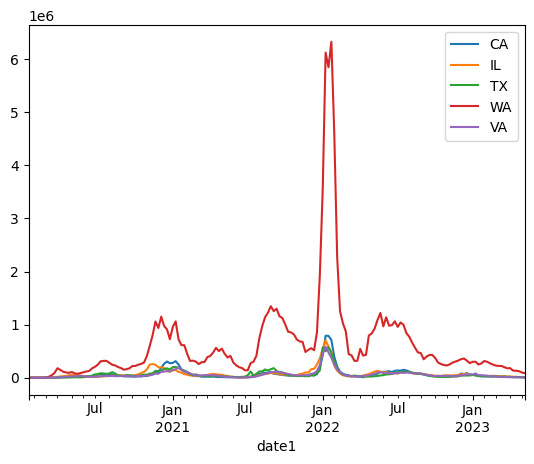

In [22]:
final_df.plot.line()

#LAB 2

In [25]:
import pandas as pd

raw_data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/2학년2학기/빅데이터응용프로그래밍/3W/survey_results_public.csv')

In [26]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [28]:
raw_data.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [ ]:
re